(14083,)
(14083,)
(14296,)
(14296,)


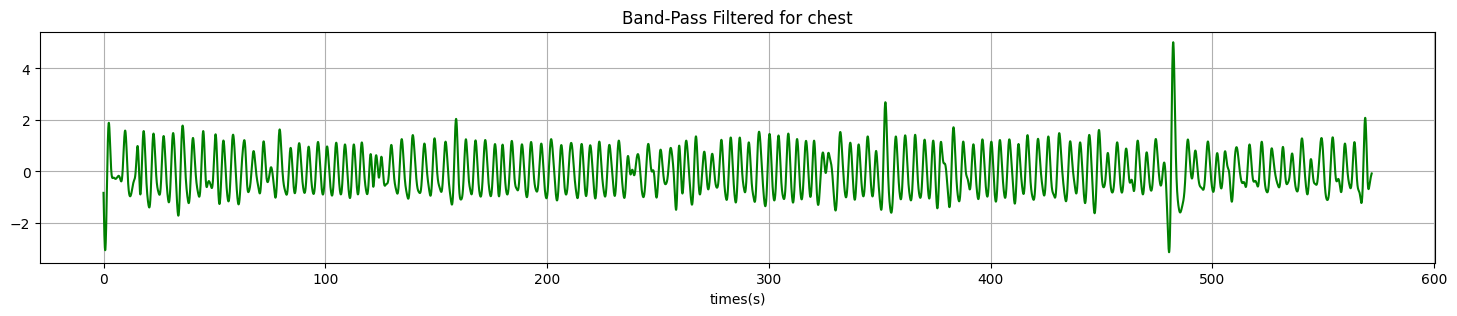

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter

# Load the CSV file
file_path = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
df = pd.read_csv(file_path)

csv_path =r"E:\IITGN\mean_of_pixels\processed_chest_resp.csv"
dff = pd.read_csv(csv_path)

# Extract data
frames = df["Frame"].values
print(frames.shape)
mean_values = df["Mean_Pixel_Value"].values
print(mean_values.shape)

# Define Butterworth filters
def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=filter_type)
    return filtfilt(b, a, data)

# Define Band-Pass filter separately
def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return filtfilt(b, a, data)

# Apply Filters
low_passed = butter_filter(mean_values, cutoff=0.5, filter_type='low')
high_passed = butter_filter(mean_values, cutoff=0.1, filter_type='high')
band_passed = butter_bandpass_filter(mean_values, lowcut=0.1, highcut=0.5)


# Apply Savitzky-Golay Filter for smoothing
# savgol_filtered = savgol_filter(mean_values, window_length=21, polyorder=2)

# Plot Original vs Filtered Data
plt.figure(figsize=(18, 3))

# plt.subplot(3, 2, 1)
# plt.plot(frames, mean_values, label="Original_nostril", color="black")
# plt.title("Original_nostril")
# # plt.xlabel("Frames")
# plt.ylabel("Mean Pixel Value")
# plt.xlim([0,3000])
# #plt.xticks(np.arange(0, 1001, step=50))
# # plt.xticks(np.arange(0, 1501, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.grid()


# # plt.subplot(3, 2, 2)
# plt.plot(frames, band_passed, label="Band-Pass Filter_nostril", color="blue")
# plt.title("Band-Pass Filtered for nostril")
# # plt.xlabel("times(s)")
# # plt.xlim([0, 3000])
# # num_ticks = len(np.arange(0, 14083, step=42))  # Get the number of tick positions
# # print(num_ticks)
# # plt.xticks(np.arange////(0, 14083, step=42), labels=np.arange(0, 2,num_ticks))
# # plt.xticks(np.arange(0, 3001, step=200))
# plt.grid()



#########################################################################################################################################

# Extract data
frames_1 = dff["Time(s)"].values
print(frames_1.shape)
mean_values_1 = dff["Force(N)"].values
print(mean_values_1.shape)

# Define Butterworth filters
def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=filter_type)
    return filtfilt(b, a, data)

# Define Band-Pass filter separately
def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return filtfilt(b, a, data)

# Apply Filters
low_passed_1 = butter_filter(mean_values_1, cutoff=0.5, filter_type='low')
high_passed_1 = butter_filter(mean_values_1, cutoff=0.1, filter_type='high')
band_passed_1 = butter_bandpass_filter(mean_values_1, lowcut=0.1, highcut=0.5)
# #graph
# plt.subplot(3,2,3)
# plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
# plt.xlabel("time(s)", fontsize=14)
# #plt.ylabel("Amplitude", fontsize=14)
# plt.title("original_chest", fontsize=16)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.xlim([0,120])
# # plt.xticks(np.arange(0,121, step=1))




# plt.subplot(3,2,4)
plt.plot(frames_1, band_passed_1, label="Band-Pass Filter_for chest", color="green")
plt.title("Band-Pass Filtered for chest")
plt.xlabel("times(s)")
# plt.xlim([0, 120])
# plt.xticks(np.arange(0,11430, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.xticks(np.arange(0,121, step=10))
plt.grid()
plt.show()
plt.tight_layout()





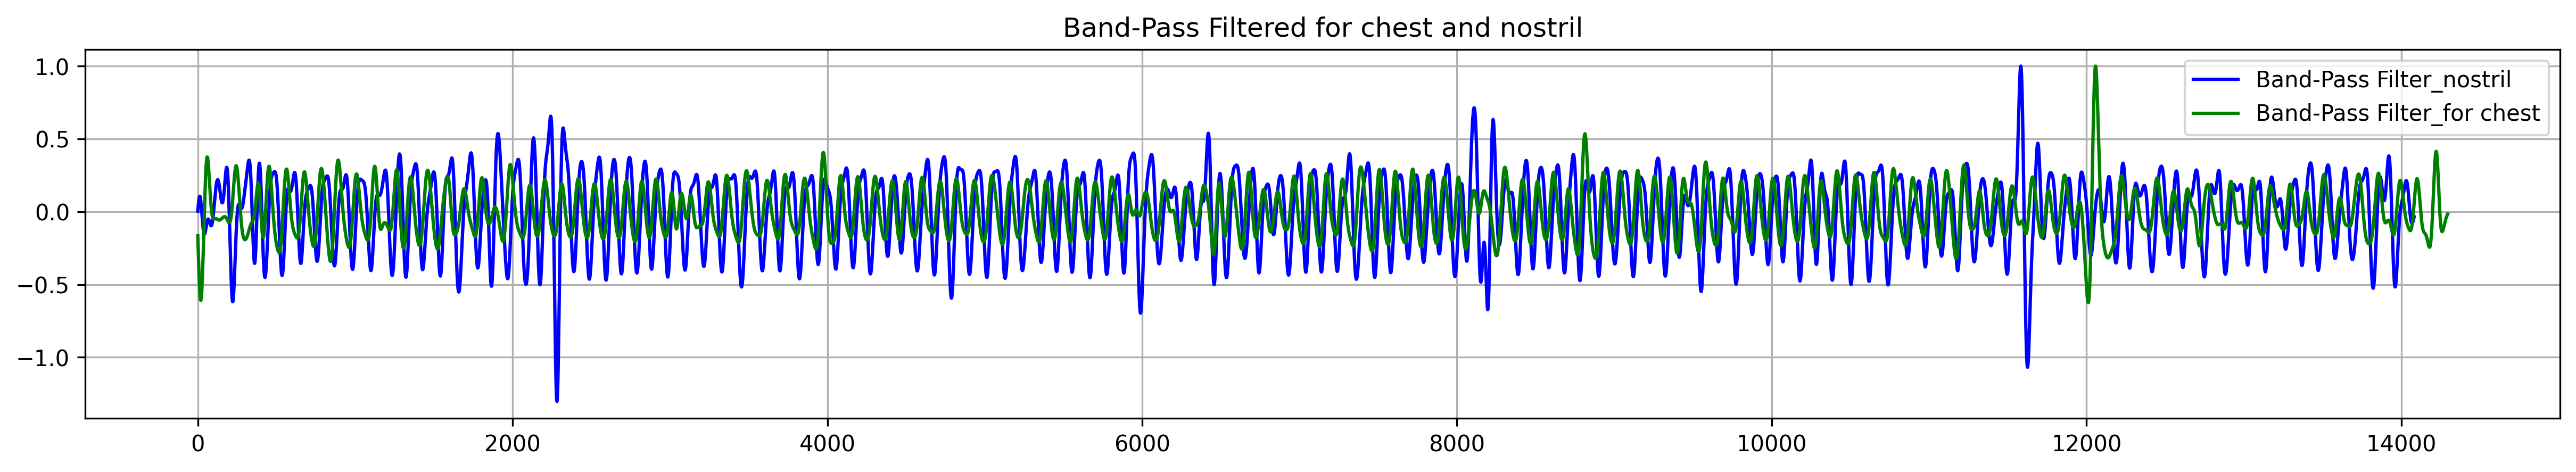

In [3]:
# plt.figure(figsize=(20,3),dpi=300)
plt.figure(figsize=(20,3),dpi=300)

plt.plot(band_passed/max(band_passed), label="Band-Pass Filter_nostril", color="blue")
# plt.show()

plt.plot(band_passed_1/max(band_passed_1), label="Band-Pass Filter_for chest", color="green")
plt.title("Band-Pass Filtered for chest and nostril")
plt.grid(True)
plt.legend()
# plt.xlim([1000,1500])
plt.show()

ground_truth_normalised [0.28268431 0.26012238 0.23769738 ... 0.37215993 0.373596   0.37494484] 

predicted_normalized [0.5674669  0.5732306  0.57884351 ... 0.54687483 0.54883301 0.55074539] 

MAE per window: [0.21773354328090289, 0.19212546334411096, 0.18395363307271134, 0.19088442782239656, 0.22113307708136426, 0.18081162802379333, 0.17721234182843873, 0.1847728198790891, 0.1839949204584217, 0.19361206050489832, 0.1699438161285583, 0.19097771481026285, 0.18830971566443772, 0.1761632401682949, 0.19093446403446737, 0.1823097189145281, 0.1985879880849718, 0.19731182766228073, 0.17434773997767997, 0.1868377594623796, 0.1919679491242165, 0.17239023060860564, 0.18410223752083, 0.21972824125114676, 0.2222862724383998, 0.1899358453618284, 0.17284757596307201, 0.1792632627443547]
RMSE per window: [0.25882885401316685, 0.23884597688235817, 0.22610632820079418, 0.23406613766640585, 0.2637263816936759, 0.2173068110385347, 0.21524953515585557, 0.22354765692449693, 0.21780722430844485, 0.229566762

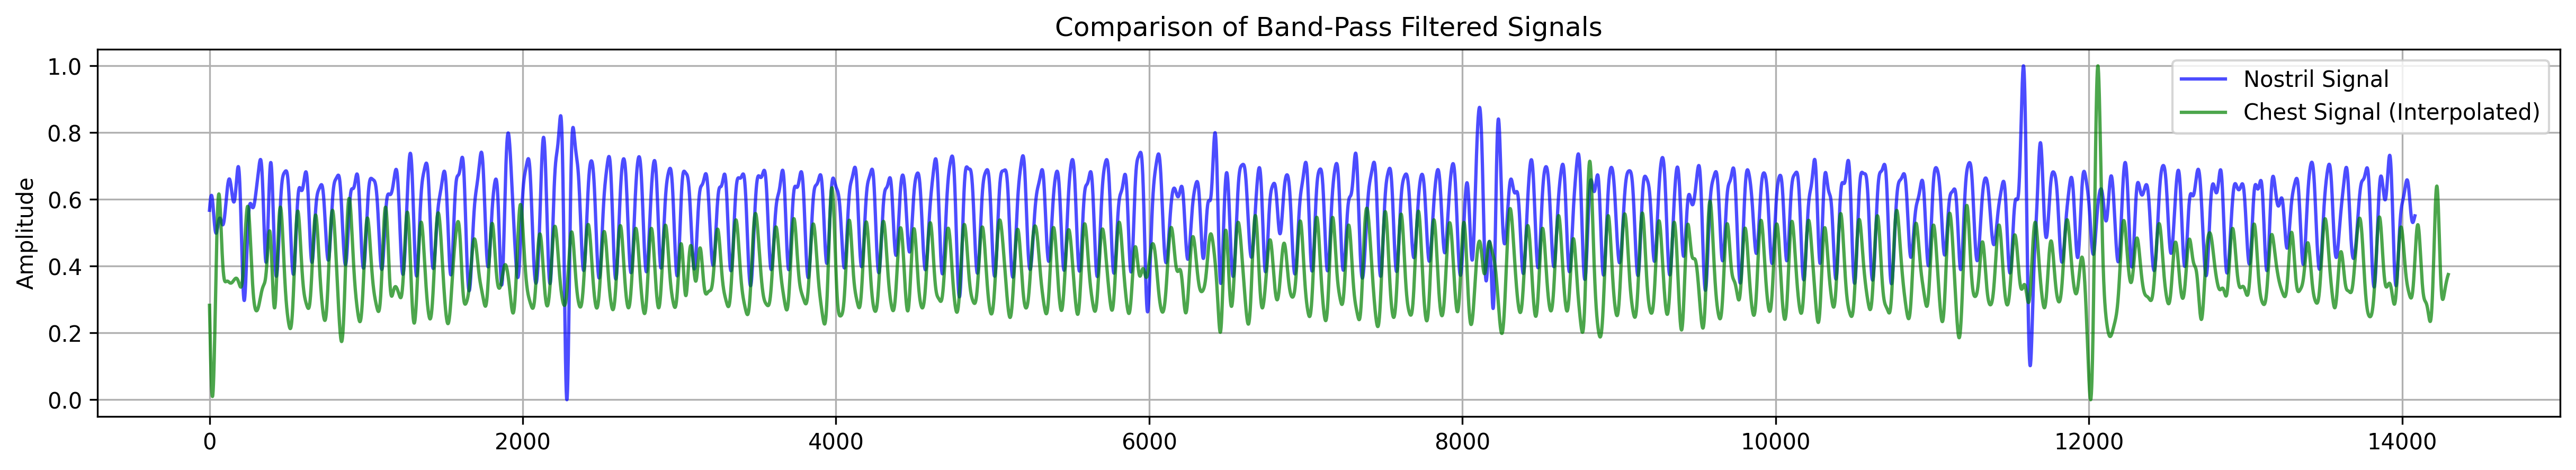

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score
import matplotlib.pyplot as plt


predicted = band_passed/max(band_passed)
ground_truth =band_passed_1/max(band_passed_1)

# print("ground_truth",band_passed_chest_normalized,"\n")
# print("orgjnal_predicted",band_passed_nostril_normalized,"\n")

# Normalize signals
ground_truth_normalized = (ground_truth - ground_truth.min()) / (ground_truth.max() - ground_truth.min())
print("ground_truth_normalised",ground_truth_normalized,"\n")
predicted_normalized = (predicted - predicted.min()) / (predicted.max() - predicted.min())
print("predicted_normalized",predicted_normalized,"\n")

# Define window parameters
sampling_rate = 25  # in Hz
window_duration = 20  # in seconds
window_size = window_duration * sampling_rate  # Number of samples per window

# Split into windows
num_samples = len(ground_truth_normalized)
ground_truth_windows = []
predicted_windows = []

for start in range(0, num_samples, window_size):
    end = start + window_size
    if end <= num_samples: 
        ground_truth_windows.append(ground_truth_normalized[start:end])
        predicted_windows.append(predicted_normalized[start:end])


ground_truth_windows_list=ground_truth_windows
predicted_windows_list=predicted_windows

# Convert lists to numpy arrays
ground_truth_windows = np.array(ground_truth_windows)
predicted_windows = np.array(predicted_windows)

# Calculate error metrics per window
mae_per_window = []
rmse_per_window = []
r2_per_window = []

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window) ** 2))  # Root Mean Square Error (RMSE)
    
    # Use scikit-learn's r2_score function
    r2 = r2_score(gt_window, pred_window)  
    
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)
    r2_per_window.append(r2)

# Print results
print("MAE per window:", mae_per_window)
print("RMSE per window:", rmse_per_window)
print("R² per window:", r2_per_window)

# Save results to CSV
results_df = pd.DataFrame({

    'Window': range(1, len(mae_per_window) + 1),
    # "GT(chest)":ground_truth_windows,
    # "Pre(Nostril)":predicted_windows,

    'MAE': mae_per_window,
    'RMSE': rmse_per_window,
    'R²': r2_per_window,
})
results_df.to_csv('error_metrics_by_window_00.csv', index=False)

print("groun truth windows",ground_truth_windows)
print(ground_truth_windows.shape)
print("predicted_windows",predicted_windows)
plt.figure(figsize=(20,3),dpi=300)

plt.plot( predicted_normalized, label="Nostril Signal", color='blue', alpha=0.7)
plt.plot( ground_truth_normalized, label="Chest Signal (Interpolated)", color='green', alpha=0.7)
plt.title("Comparison of Band-Pass Filtered Signals")
# plt.xlabel("Time (minutes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
# plt.xlim([0,2])
plt.show()




In [6]:
mean_MAE=np.mean(mae_per_window)
# print("mean of MAE",mean_MAE)
print("mean of MAE",round(mean_MAE,2))
mean_RMSE=np.mean(rmse_per_window)
# print("mean of RMSE",mean_RMSE)
print("mean of RMSE",round(mean_RMSE,2))


mean of MAE 0.19
mean of RMSE 0.23


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import pandas as pd

# # Step 1: Generate synthetic signal data
sampling_rate = 25  # Sampling rate in Hz
# duration = 120       # Total duration of the signal in seconds
# time = np.linspace(0, duration, duration * sampling_rate, endpoint=False)

# # Create a synthetic signal with multiple frequencies
# freq1 = 5   # Frequency of first component (Hz)
# freq2 = 15  # Frequency of second component (Hz)
# signal = np.sin(2 * np.pi * freq1 * time) + np.sin(2 * np.pi * freq2 * time)

# # Step 2: Divide the signal into 20-second windows
# window_size = 20 * sampling_rate  # Number of samples per window
# num_windows = len(signal) // window_size

# windows = [signal[i * window_size:(i + 1) * window_size] for i in range(num_windows)]
windows = ground_truth_windows#ground_truth_windows_list
windows_p= predicted_windows#predicted_windows_list

# print("len",len(windows))
# print(windows)


# Step 3: Calculate the dominant frequency in each window
dominant_frequencies = []
dominant_frequencies_p=[]

for i, window in enumerate(windows):
    frequencies, power_spectrum = periodogram(window, fs=sampling_rate)
    dominant_frequency = frequencies[np.argmax(power_spectrum)]
    dominant_frequencies.append(dominant_frequency)

for i, window in enumerate(windows_p):
    frequencies_1, power_spectrum_1 = periodogram(window, fs=sampling_rate)
    dominant_frequency_1 = frequencies_1[np.argmax(power_spectrum_1)]
    dominant_frequencies_p.append(dominant_frequency_1)

# Print the dominant frequencies for each window
for i, freq in enumerate(dominant_frequencies):
    print(f"Window {i + 1}: Dominant Frequency gt = {freq} Hz")
for i, freq in enumerate(dominant_frequencies_p):
    print(f"Window {i + 1}: Dominant Frequency pre = {freq} Hz")    
    
#save into csv
csv_file=pd.DataFrame({
    'window':np.arange(1,len(windows)+1),
    'dom_fre_gt':dominant_frequencies,
    'dom_fre_pre':dominant_frequencies_p,
}
    
)

csv_file.to_csv("dominant_frequwncy.csv",index=False)







Window 1: Dominant Frequency gt = 0.25 Hz
Window 2: Dominant Frequency gt = 0.25 Hz
Window 3: Dominant Frequency gt = 0.2 Hz
Window 4: Dominant Frequency gt = 0.25 Hz
Window 5: Dominant Frequency gt = 0.25 Hz
Window 6: Dominant Frequency gt = 0.25 Hz
Window 7: Dominant Frequency gt = 0.2 Hz
Window 8: Dominant Frequency gt = 0.2 Hz
Window 9: Dominant Frequency gt = 0.25 Hz
Window 10: Dominant Frequency gt = 0.25 Hz
Window 11: Dominant Frequency gt = 0.2 Hz
Window 12: Dominant Frequency gt = 0.25 Hz
Window 13: Dominant Frequency gt = 0.2 Hz
Window 14: Dominant Frequency gt = 0.25 Hz
Window 15: Dominant Frequency gt = 0.25 Hz
Window 16: Dominant Frequency gt = 0.25 Hz
Window 17: Dominant Frequency gt = 0.25 Hz
Window 18: Dominant Frequency gt = 0.25 Hz
Window 19: Dominant Frequency gt = 0.25 Hz
Window 20: Dominant Frequency gt = 0.25 Hz
Window 21: Dominant Frequency gt = 0.25 Hz
Window 22: Dominant Frequency gt = 0.2 Hz
Window 23: Dominant Frequency gt = 0.25 Hz
Window 24: Dominant Freque

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score
import matplotlib.pyplot as plt


file=pd.read_csv(r"E:\IITGN\mean_of_pixels\dominant_frequwncy.csv")

print(file["dom_fre_gt"].values)
print(file["dom_fre_pre"].values)

ground_truth_windows=file["dom_fre_gt"].values
predicted_windows=file["dom_fre_pre"].values
window_no=file["window"].values

# Calculate error metrics per window
mae_per_window = []
rmse_per_window = []
r2_per_window = []

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window) ** 2))  # Root Mean Square Error (RMSE)

    
    # Use scikit-learn's r2_score function
    # r2 = r2_score(gt_window, pred_window)  
    
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)
    # r2_per_window.append(r2)

# r2 = r2_score(ground_truth_windows, predicted_windows)
# r2_per_window.append(r2)
# # Print results
# print("MAE per window:", mae_per_window)
# print("RMSE per window:", rmse_per_window)
# print("R² for gt and pre:", r2_per_window)

# #Save results to CSV
# results_df = pd.DataFrame({

#     'Window': range(1, len(mae_per_window) + 1),
#     # "GT(chest)":ground_truth_windows,
#     # "Pre(Nostril)":predicted_windows,

#     'MAE': mae_per_window,
#     'RMSE': rmse_per_window,
#     # 'R²': r2_per_window,
# })
# results_df.to_csv('fre_error_metrics_for_frequency.csv', index=False)

# print("groun truth windows",ground_truth_windows)
# print(ground_truth_windows.shape)
# print("predicted_windows",predicted_windows)
# plt.figure(figsize=(20,3),dpi=300)

# plt.plot( predicted_normalized, label="Nostril Signal", color='blue', alpha=0.7)
# plt.plot( ground_truth_normalized, label="Chest Signal (Interpolated)", color='green', alpha=0.7)
# plt.title("Comparison of Band-Pass Filtered Signals")
# # plt.xlabel("Time (minutes)")
# plt.ylabel("Amplitude")
# plt.legend()
# plt.grid(True)
# # plt.xlim([0,2])
# plt.show()




[0.25 0.25 0.2  0.25 0.25 0.25 0.2  0.2  0.25 0.25 0.2  0.25 0.2  0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.2  0.25 0.25 0.2  0.2  0.2  0.2 ]
[0.15 0.25 0.25 0.25 0.25 0.25 0.2  0.2  0.25 0.25 0.2  0.25 0.2  0.25
 0.2  0.25 0.25 0.25 0.25 0.25 0.25 0.2  0.25 0.25 0.2  0.2  0.2  0.2 ]
R² for gt and pre: [0.06666666666666643]


In [29]:
r2_score(ground_truth_windows,predicted_windows)

0.06666666666666643

In [13]:
mean_MAE=np.mean(mae_per_window)
# print("mean of MAE",mean_MAE)
print("mean of MAE",round(mean_MAE,2))
mean_RMSE=np.mean(rmse_per_window)
# print("mean of RMSE",mean_RMSE)
print("mean of RMSE",round(mean_RMSE,2))


#save into csv
csv_file=pd.DataFrame({
    'window':np.arange(1,len(windows)+1),
    'dom_fre_gt':dominant_frequencies,
    'dom_fre_pre':dominant_frequencies_p,
    'mae_per_window':mae_per_window,
    'rmse_per_window':rmse_per_window,
    "mean of MAE":round(mean_MAE,2),
    "mean of RMSE":round(mean_RMSE,2),
})
csv_file.to_csv("ex_1_result.csv",index=False)



mean of MAE 0.01
mean of RMSE 0.01


In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score
import matplotlib.pyplot as plt

# Calculate mean of each window
gt_mean_per_window = []
pre_mean_per_window = []


for gt_mean_window, pred_mean_window in zip(ground_truth_windows, predicted_windows):
    gt_mean = np.mean(gt_mean_window)  
    pre_mean = np.mean(pred_mean_window)  
    
    # Use scikit-learn's r2_score function
    # r2 = r2_score(gt_window, pred_window)  
    
    gt_mean_per_window.append(gt_mean)
    pre_mean_per_window.append(pre_mean)
    
print("mean of gt per window",gt_mean_per_window )
print(len(gt_mean_per_window))
print("mean of predicted per window",pre_mean_per_window)

# Save results to CSV
results_df = pd.DataFrame({

    'Window': range(1, len(mae_per_window) + 1),
    # "GT(chest)":ground_truth_windows,
    # "Pre(Nostril)":predicted_windows,

    'gt_mean': gt_mean_per_window,
    'pre_mean': pre_mean_per_window,
    
})
results_df.to_csv('mean of each window of pre and gt.csv', index=False)
       

mean of gt per window [0.377266223447365, 0.376471972982934, 0.3939777460161349, 0.38294292521099366, 0.3771665037038282, 0.384610292172565, 0.3908654439439962, 0.3886489687216667, 0.3777681640673961, 0.38112557980087525, 0.3900424756710892, 0.38083485744340867, 0.38555006958575644, 0.389270702293087, 0.37611452657435995, 0.38683479526930215, 0.3825467911854329, 0.38340549294125037, 0.3937461974188705, 0.3778272159865612, 0.38139334964346594, 0.3875288314051847, 0.3837920756897614, 0.38263165724724457, 0.39147192905738315, 0.38159574903699184, 0.38240698634591885, 0.3877537031481164]
28
mean of predicted per window [0.5698757271487431, 0.5577822319836733, 0.5714457307539312, 0.5585818269053249, 0.5675604439524359, 0.5651234653829829, 0.5646753308432808, 0.5733438492375525, 0.5612152034777214, 0.5728411069766393, 0.5589828012474387, 0.5641764448664367, 0.5719641983586942, 0.5646595919122098, 0.5600555725504337, 0.5672640740550469, 0.5643763050740263, 0.5711883953901099, 0.56679565611855

now this is anthor approch

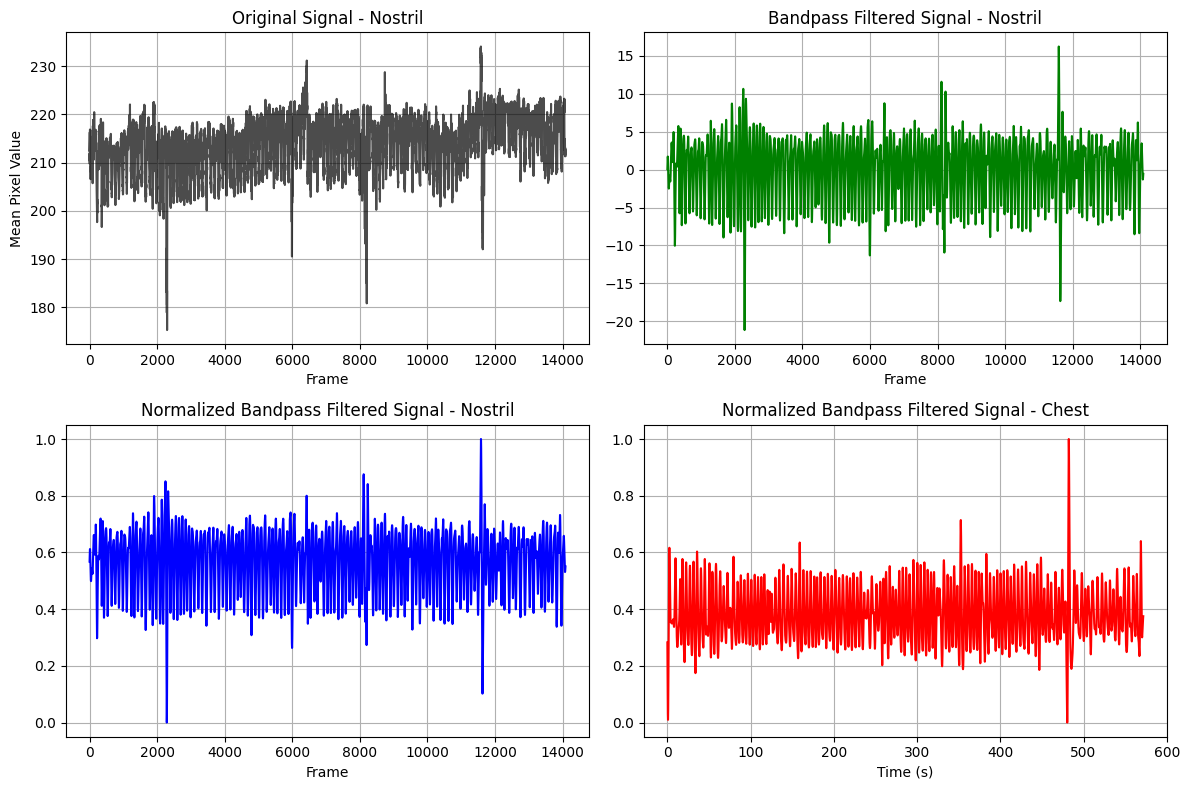

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

# ====================== Load Data ======================

# File paths (Modify these as per your actual file location)
file_path_nostril = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
file_path_chest = r"E:\IITGN\mean_of_pixels\processed_chest_resp.csv"

# Load the CSV files
df_nostril = pd.read_csv(file_path_nostril)
df_chest = pd.read_csv(file_path_chest)

# Extract required columns
frames_nostril = df_nostril["Frame"].values
mean_values_nostril = df_nostril["Mean_Pixel_Value"].values

frames_chest = df_chest["Time(s)"].values
mean_values_chest = df_chest["Force(N)"].values

# ====================== Define Bandpass Filter ======================

def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# ====================== Apply Bandpass Filter ======================

# Define cutoff frequencies
lowcut = 0.1
highcut = 0.5

# Apply bandpass filter
band_passed_nostril = butter_bandpass_filter(mean_values_nostril, lowcut, highcut)
band_passed_chest = butter_bandpass_filter(mean_values_chest, lowcut, highcut)

# ====================== Normalize the Filtered Signal ======================

scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize to range [0,1]

# Reshape for sklearn scaler
band_passed_nostril_normalized = scaler.fit_transform(band_passed_nostril.reshape(-1, 1)).flatten()
band_passed_chest_normalized = scaler.fit_transform(band_passed_chest.reshape(-1, 1)).flatten()

# ====================== Plot Results ======================

plt.figure(figsize=(12, 8))

# Original vs Filtered vs Normalized - Nostril
plt.subplot(2, 2, 1)
plt.plot(frames_nostril, mean_values_nostril, label="Original", color="black", alpha=0.7)
plt.title("Original Signal - Nostril")
plt.xlabel("Frame")
plt.ylabel("Mean Pixel Value")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(frames_nostril, band_passed_nostril, label="Bandpass Filtered", color="green")
plt.title("Bandpass Filtered Signal - Nostril")
plt.xlabel("Frame")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(frames_nostril, band_passed_nostril_normalized, label="Normalized", color="blue")
plt.title("Normalized Bandpass Filtered Signal - Nostril")
plt.xlabel("Frame")
# plt.xlim([0,1500])
plt.grid()

# Original vs Filtered vs Normalized - Chest
plt.subplot(2, 2, 4)
plt.plot(frames_chest, band_passed_chest_normalized, label="Normalized", color="red")
plt.title("Normalized Bandpass Filtered Signal - Chest")
plt.xlabel("Time (s)")
# plt.xlim([0,60])
plt.grid()

plt.tight_layout()
plt.show()


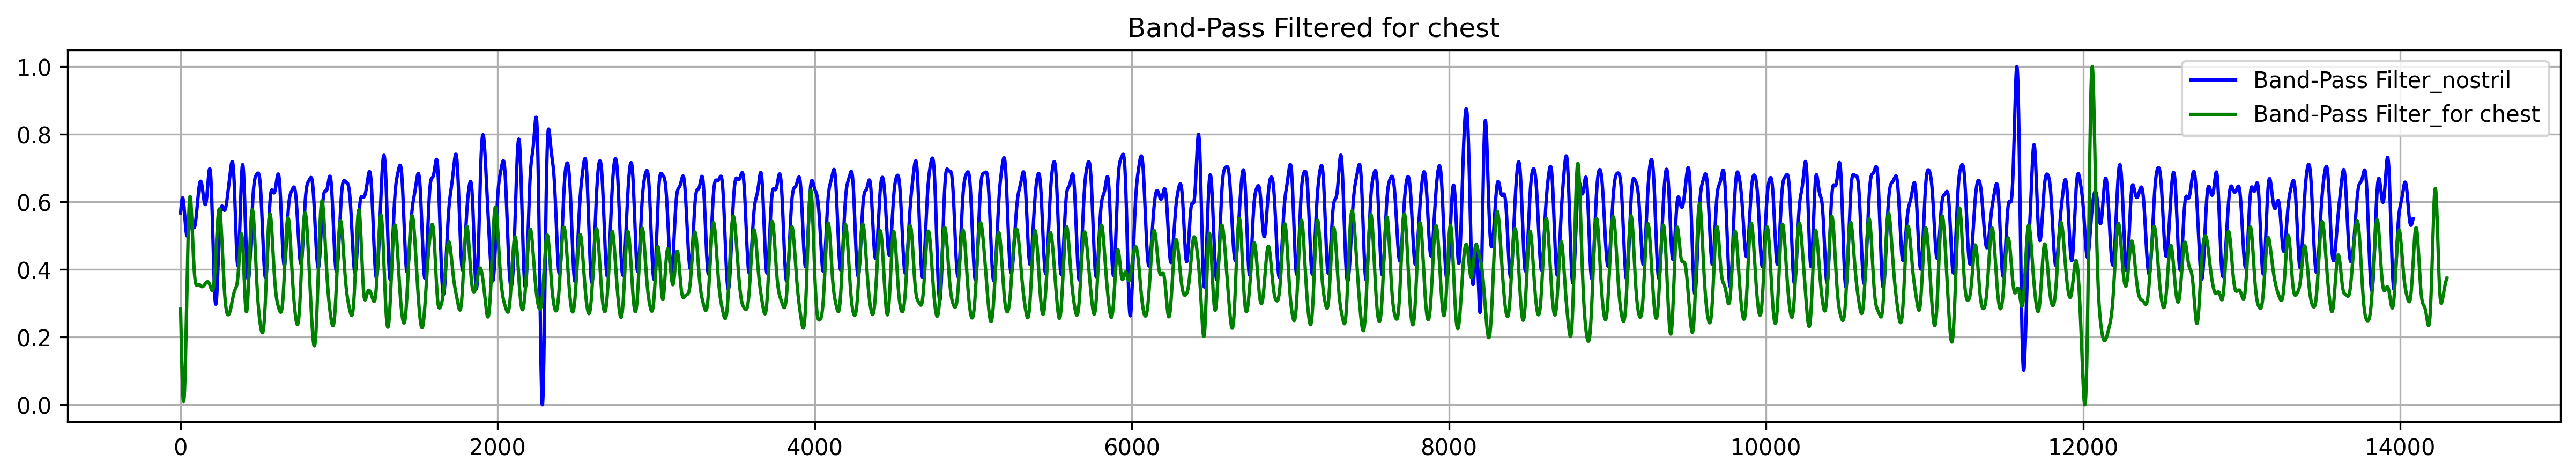

In [32]:

plt.figure(figsize=(20,3),dpi=300)
plt.plot(band_passed_nostril_normalized/max(band_passed_nostril_normalized), label="Band-Pass Filter_nostril", color="blue")
# plt.show()

plt.plot(band_passed_chest_normalized/max(band_passed_chest_normalized), label="Band-Pass Filter_for chest", color="green")
plt.title("Band-Pass Filtered for chest")
plt.grid(True)
plt.legend()
# plt.xlim([0,8000])
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score

# # Load data
# nostril = pd.read_csv(r'E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv')
# chest = pd.read_csv(r'E:\IITGN\mean_of_pixels\processed_chest_resp.csv')

# predicted = band_passed_nostril_normalized
# ground_truth = band_passed_chest_normalized

# print("ground_truth",band_passed_chest_normalized,"\n")
# print("orgjnal_predicted",band_passed_nostril_normalized,"\n")

# # Normalize signals
# ground_truth_normalized = (ground_truth - ground_truth.min()) / (ground_truth.max() - ground_truth.min())
# print("ground_truth_normalised",ground_truth_normalized,"\n")
# predicted_normalized = (predicted - predicted.min()) / (predicted.max() - predicted.min())
# print("predicted_normalized",predicted_normalized,"\n")

ground_truth_normalized=adjusted_chest_signal/max(adjusted_chest_signal)

predicted_normalized=adjusted_nostril_signal/max(adjusted_nostril_signal)

# Define window parameters
sampling_rate = 25  # in Hz
window_duration = 20  # in seconds
window_size = window_duration * sampling_rate  # Number of samples per window

# Split into windows
num_samples = len(ground_truth_normalized)
ground_truth_windows = []
predicted_windows = []

for start in range(0, num_samples, window_size):
    end = start + window_size
    if end <= num_samples: 
        ground_truth_windows.append(ground_truth_normalized[start:end])
        predicted_windows.append(predicted_normalized[start:end])

# Convert lists to numpy arrays
ground_truth_windows = np.array(ground_truth_windows)
predicted_windows = np.array(predicted_windows)

# Calculate error metrics per window
mae_per_window = []
rmse_per_window = []
r2_per_window = []

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window) ** 2))  # Root Mean Square Error (RMSE)
    
    # Use scikit-learn's r2_score function
    r2 = r2_score(gt_window, pred_window)  
    
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)
    r2_per_window.append(r2)

# Print results
print("MAE per window:", mae_per_window)
print("RMSE per window:", rmse_per_window)
print("R² per window:", r2_per_window)

# Save results to CSV
results_df = pd.DataFrame({
    'Window': range(1, len(mae_per_window) + 1),
    'MAE': mae_per_window,
    'RMSE': rmse_per_window,
    'R²': r2_per_window,
})
results_df.to_csv('error_metrics_by_window_r222222.csv', index=False)


MAE per window: [0.207557872811862, 0.24712535415143527, 0.2051249370827697, 0.2282734831411821, 0.2651180593925137, 0.21093023934005722, 0.2121404822699955, 0.223805526674201, 0.22261596737605108, 0.24026955982261655, 0.2097818707280788, 0.2391075669970557, 0.18111198140365084, 0.20546513073009987, 0.23908205239881059, 0.20806094282813142, 0.227622608882829, 0.24713887624835146, 0.20275809223595118, 0.22732528116845357, 0.23648280963049687, 0.22631902584081837, 0.21959118669438066, 0.21301800563369933, 0.22263872002294688, 0.18982520187891816, 0.20469125464433405]
RMSE per window: [0.24748786239963835, 0.2854480080382144, 0.24788668125548036, 0.27172098492070484, 0.3125319375531666, 0.2541796800097053, 0.2460971383859079, 0.25741440247771885, 0.2597676097590547, 0.2793276830083767, 0.25510312848272876, 0.27469185756991565, 0.2189183665604517, 0.2439079958788493, 0.28146325734824196, 0.24983308150999564, 0.27129432763828587, 0.29034209928067983, 0.24539484477475662, 0.2667971446810871,

In [30]:
mean_MAE=np.mean(mae_per_window)
# print("mean of MAE",mean_MAE)
print("mean of MAE",round(mean_MAE,2))
mean_RMSE=np.mean(rmse_per_window)
# print("mean of RMSE",mean_RMSE)
print("mean of RMSE",round(mean_RMSE,2))


mean of MAE 0.22
mean of RMSE 0.26


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt
# from sklearn.preprocessing import MinMaxScaler

# # ====================== Load Data ======================

# # File paths (Modify these as per your actual file location)
# file_path_nostril = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
# file_path_chest = r"E:\IITGN\mean_of_pixels\processed_chest_resp.csv"

# # Load the CSV files
# df_nostril = pd.read_csv(file_path_nostril)
# df_chest = pd.read_csv(file_path_chest)

# # Extract required columns
# frames_nostril = df_nostril["Frame"].values
# mean_values_nostril = df_nostril["Mean_Pixel_Value"].values

# frames_chest = df_chest["Time(s)"].values
# mean_values_chest = df_chest["Force(N)"].values

# # ====================== Define Bandpass Filter ======================

# def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
#     nyq = 0.5 * fs  # Nyquist frequency
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return filtfilt(b, a, data)

# # ====================== Apply Bandpass Filter ======================

# # Define cutoff frequencies
# lowcut = 0.1
# highcut = 0.5

# # Apply bandpass filter
# band_passed_nostril = butter_bandpass_filter(mean_values_nostril, lowcut, highcut)
# band_passed_chest = butter_bandpass_filter(mean_values_chest, lowcut, highcut)

# # ====================== Normalize the Filtered Signal ======================

# scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize to range [0,1]

# # Reshape for sklearn scaler
# band_passed_nostril_normalized = scaler.fit_transform(band_passed_nostril.reshape(-1, 1)).flatten()
# band_passed_chest_normalized = scaler.fit_transform(band_passed_chest.reshape(-1, 1)).flatten()

# # ====================== Compute Cross-Correlation ======================

# # Compute cross-correlation
# correlation = np.correlate(band_passed_nostril_normalized - np.mean(band_passed_nostril_normalized),
#                            band_passed_chest_normalized - np.mean(band_passed_chest_normalized),
#                            mode='full')

# # Compute lag values
# lags = np.arange(-len(band_passed_chest_normalized) + 1, len(band_passed_nostril_normalized))

# # Find the lag with maximum correlation
# max_corr_lag = lags[np.argmax(correlation)]
# max_corr_value = np.max(correlation)

# print(f"Maximum Correlation: {max_corr_value}")
# print(f"Best Lag (Time Shift): {max_corr_lag} samples")

# # ====================== Plot Cross-Correlation ======================

# plt.figure(figsize=(10, 5))
# plt.plot(lags, correlation, label="Cross-Correlation", color="purple")
# plt.axvline(x=max_corr_lag, color='red', linestyle='--', label=f"Max Corr at Lag {max_corr_lag}")
# plt.title("Cross-Correlation between Nostril and Chest Signals")
# plt.xlabel("Lag (Samples)")
# plt.ylabel("Correlation")
# plt.legend()
# plt.grid()
# plt.show()


In [ ]:
# # Shift nostril signal forward by 84 samples
# shift_amount = 84  # From cross-correlation result

# # Trim the beginning of the nostril signal and the end of the chest signal
# adjusted_nostril_signal = band_passed_nostril_normalized[shift_amount:]
# adjusted_chest_signal = band_passed_chest_normalized[:-shift_amount]  # Trim to match length

# # Ensure both signals are of the same length
# min_length = min(len(adjusted_nostril_signal), len(adjusted_chest_signal))
# adjusted_nostril_signal = adjusted_nostril_signal[:min_length]
# adjusted_chest_signal = adjusted_chest_signal[:min_length]

# # Now use these adjusted signals in your regression model
# print(adjusted_nostril_signal.shape)
# print(adjusted_chest_signal.shape)